In [1]:
__depends__ = ["data/vel_time-averaged.npz","data/vel_snapshot_daily-averaged.npz"]
__dest__    = []

In [57]:
import numpy as np
import scipy as sp
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
import cmocean
plt.rcParams['lines.linewidth'] = 2
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import seawater as sw

from numba import jit

In [3]:
data = np.load(__depends__[0])
snap = np.load(__depends__[1])

In [4]:
lonlim = [data['lon'].min(),data['lon'].max()]
latlim = [data['lat'].min(),data['lat'].max()]

In [5]:
m = Basemap(projection='merc',llcrnrlat=latlim[0],urcrnrlat=latlim[1],\
            llcrnrlon=lonlim[0],urcrnrlon=lonlim[1],lat_ts=-25.,resolution='i')

In [6]:
loni,lati = np.meshgrid(data['lon'],data['lat'])
x,y = m(loni,lati)

In [7]:
# Sao Sebastiao
pos0 = [-45.403225806451609, -23.986979166666664]
pos1 = [-42.258064516129032, -27.815104166666664]
x0,y0 = m(pos0[0],pos0[1])
x1,y1 = m(pos1[0],pos1[1])
# Cabo Frio
pos0_cf = [-41.983870967741936, -23.039062499999996]
pos1_cf = [-40.032258064516128, -25.263020833333329]
x0_cf,y0_cf = m(pos0_cf[0],pos0_cf[1])
x1_cf,y1_cf = m(pos1_cf[0],pos1_cf[1])
# Ubatuba
pos0_ub = [-44.693548387096776, -23.622395833333329]
pos1_ub = [-42.241935483870968, -27.031249999999996]

x0_ub,y0_ub = m(pos0_ub[0],pos0_ub[1])
x1_ub,y1_ub = m(pos1_ub[0],pos1_ub[1])
# Santos
pos0_sa = [-46.20967741935484, -24.170312499999996]
pos1_sa = [-43.467741935483872, -27.486979166666664]
x0_sa,y0_sa = m(pos0_sa[0],pos0_sa[1])
x1_sa,y1_sa = m(pos1_sa[0],pos1_sa[1])

dec = 5
iz = 47
data['z'][iz]

-791.34998

In [56]:
nz,ny,nx = data['u'].shape
ubot = np.zeros((ny,nx))
vbot = np.zeros((ny,nx))

In [102]:
#@jit
def get_bottom_current():
    for i in range(ny):
        for j in range(nx):
            fnnan = ~np.isnan(data['u'][:,i,j])
            try:
                ubot[i,j] = np.nanmean(data['u'][:,i,j][fnnan][-4:])
                vbot[i,j] = np.nanmean(data['v'][:,i,j][fnnan][-4:])
            except:
                pass

In [121]:
#get_bottom_current()

In [122]:
np.savez("data/bottom_currents_time-averaged.npz",u=ubot,v=vbot)

/Users/crocha/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


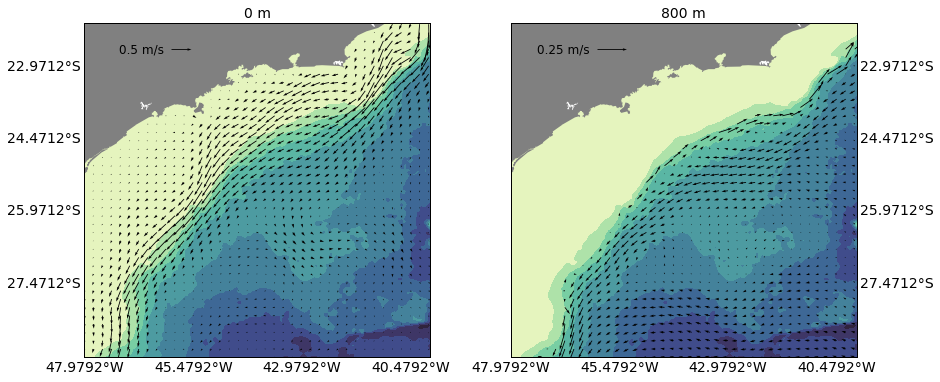

In [123]:
fig = plt.figure(figsize = (14,6))

plt.subplot(121)
m.contourf(x,y,snap['topo'],10,cmap=cmocean.cm.deep)
Q = m.quiver(x[::dec,::dec],y[::dec,::dec],data['u'][0,::dec,::dec],data['v'][0,::dec,::dec])
#plt.plot([x0,x1],[y0,y1],'r',linewidth=4,alpha=.5)
#plt.plot([x0_cf,x1_cf],[y0_cf,y1_cf],'r',linewidth=4,alpha=.5)
#plt.plot([x0_ub,x1_ub],[y0_ub,y1_ub],'r',linewidth=4,alpha=.5)
#plt.plot([x0_sa,x1_sa],[y0_sa,y1_sa],'r',linewidth=4,alpha=.5)
qk = plt.quiverkey(Q, 0.25, 0.92, .5, r'0.5 m/s', labelpos='W',
                   fontproperties={'size': 12})
m.drawparallels(np.arange(latlim[0],latlim[1],1.5),labels=[1,0,0,0],fontsize=14,linewidth=0)
m.drawmeridians(np.arange(lonlim[0],lonlim[1],2.5),labels=[0,0,0,1],fontsize=14,linewidth=0)
m.fillcontinents(color='.5',lake_color=None)
plt.title('0 m')

plt.subplot(122)
m.contourf(x,y,snap['topo'],10,cmap=cmocean.cm.deep)
Q= m.quiver(x[::dec,::dec],y[::dec,::dec],data['u'][47,::dec,::dec],data['v'][47,::dec,::dec])
#plt.plot([x0,x1],[y0,y1],'r',linewidth=4,alpha=.5)
#plt.plot([x0_cf,x1_cf],[y0_cf,y1_cf],'r',linewidth=4,alpha=.5)
#plt.plot([x0_ub,x1_ub],[y0_ub,y1_ub],'r',linewidth=4,alpha=.5)
#plt.plot([x0_sa,x1_sa],[y0_sa,y1_sa],'r',linewidth=4,alpha=.5)
qk = plt.quiverkey(Q, 0.25, 0.92, .25, r'0.25 m/s', labelpos='W',
                   fontproperties={'size': 12})
m.drawparallels(np.arange(latlim[0],latlim[1],1.5),labels=[0,1,0,0],fontsize=14,linewidth=0)
m.drawmeridians(np.arange(lonlim[0],lonlim[1],2.5),labels=[0,0,0,1],fontsize=14,linewidth=0)
m.fillcontinents(color='.5',lake_color=None)
plt.title('800 m')

plt.savefig("figures/LLC2160_currents.pdf")

/Users/crocha/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


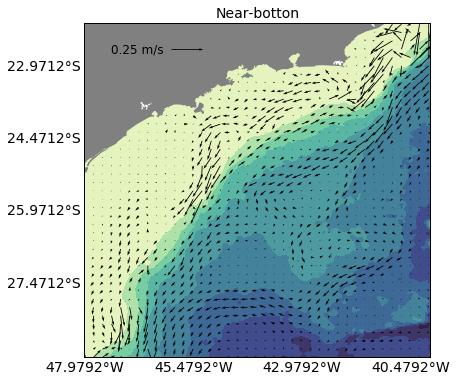

In [298]:
fig = plt.figure(figsize = (7,6))

plt.subplot(111)
m.contourf(x,y,snap['topo'],10,cmap=cmocean.cm.deep)
Q = m.quiver(x[::dec,::dec],y[::dec,::dec],ubot[::dec,::dec],vbot[::dec,::dec])
m.drawparallels(np.arange(latlim[0],latlim[1],1.5),labels=[1,0,0,0],fontsize=14,linewidth=0)
m.drawmeridians(np.arange(lonlim[0],lonlim[1],2.5),labels=[0,0,0,1],fontsize=14,linewidth=0)
m.fillcontinents(color='.5',lake_color=None)
plt.title('Near-botton')
qk = plt.quiverkey(Q, 0.25, 0.92, .25, r'0.25 m/s', labelpos='W',
                   fontproperties={'size': 12})
plt.savefig("figures/LLC2160_bottom-currents.pdf")

In [125]:
def find_nearest_ind(x,y,x0,y0):
    """find nearest point"""
    indx = np.abs(x-x0).argmin()
    indy = np.abs(y-y0).argmin()
    return indx, indy

def extract_vel_section(pos0,pos1,long,latg,ug,vg,nz=68,dd=6.):

    lon0,lat0 = pos0[0],pos0[1]
    lon1,lat1 = pos1[0],pos1[1]

    ilon0,ilat0 = find_nearest_ind(long,latg,lon0,lat0)
    ilon1,ilat1 = find_nearest_ind(long,latg,lon1,lat1)

    dist01,ang01 = sw.dist(lat=[lat0,lat1],lon=[lon0,lon1],units='km')

    # rotation matrix
    ang01 = ang01*np.pi/180.
    c,s = np.cos(ang01), np.sin(ang01)
    R = np.array([[c,s],[-s,c]]).squeeze()

    loni,lati = np.meshgrid(long,latg)
    
    # number of samples
    num = int(dist01/dd)

    lonc = np.linspace(lon0,lon1,num)
    latc = np.linspace(lat0,lat1,num)

    ilonc = np.linspace(ilon0,ilon1,num)
    ilatc = np.linspace(ilat0,ilat1,num)

    for iz in range(nz):
    
        uaux = sp.ndimage.map_coordinates(ug[iz], np.vstack((ilatc,ilonc)),order=1)
        vaux = sp.ndimage.map_coordinates(vg[iz], np.vstack((ilatc,ilonc)),order=1)

        urot = np.einsum("ij,jk->ik",R,np.vstack([uaux,vaux]))   # this is pretty cool
        uaux, vaux = urot[0],urot[1]
    
        if iz == 0:
            u = uaux[np.newaxis,...]
            v = uaux[np.newaxis,...]
        else:
            u = np.concatenate([u,uaux[np.newaxis,...]])
            v = np.concatenate([v,vaux[np.newaxis,...]])
    
    # interpolated position and distance
    lon = sp.ndimage.map_coordinates(loni, np.vstack((ilatc,ilonc)),order=1)
    lat = sp.ndimage.map_coordinates(lati, np.vstack((ilatc,ilonc)),order=1)
    dist,_ = sw.dist(lat=lat,lon=lon,units='km')
    dist = np.hstack([0,np.cumsum(dist)])
    
    return lon,lat,dist,u,v

In [126]:
iz =47

In [127]:
lons,lats,dists,us,vs =  extract_vel_section(pos0,pos1,data['lon'],data['lat'],data['u'],data['v'],nz=68)
lons_cf,lats_cf,dists_cf,us_cf,vs_cf =  extract_vel_section(pos0_cf,pos1_cf,data['lon'],data['lat'],data['u'],data['v'],nz=68)
lons_sa,lats_sa,dists_sa,us_sa,vs_sa =  extract_vel_section(pos0_sa,pos1_sa,data['lon'],data['lat'],data['u'],data['v'],nz=68)
lons_ub,lats_ub,dists_ub,us_ub,vs_ub =  extract_vel_section(pos0_ub,pos1_ub,data['lon'],data['lat'],data['u'],data['v'],nz=68)

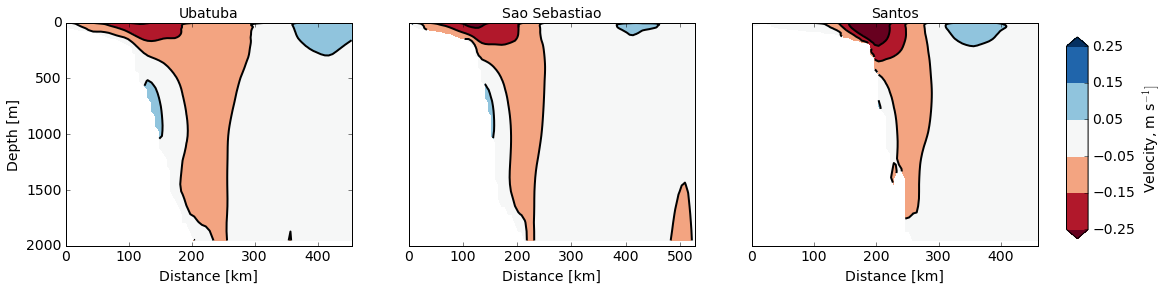

In [128]:
cv = np.linspace(-.25,.25,8)
cv = np.array([-.25,-.15,-.05,.05,.15,.25])
zs = -data['z']

fig = plt.figure(figsize =(20,4))

plt.subplot(131)
plt.contourf(dists_ub,zs,vs_ub,cv,cmap='RdBu',vmin=cv.min(),
             vmax=cv.max(),extend='both')
#plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists_ub,zs,vs_ub,cv,colors='k')
plt.ylim(2000,0)
plt.xlabel('Distance [km]')
plt.ylabel('Depth [m]')
plt.title('Ubatuba')
plt.subplot(132)
plt.contourf(dists,zs,vs,cv,cmap='RdBu',vmin=cv.min(),
             vmax=cv.max(),extend='both')
#plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists,zs,vs,cv,colors='k')
plt.ylim(2000,0)
plt.yticks([])
plt.xlabel('Distance [km]')
plt.title('Sao Sebastiao')
#plt.ylabel('Depth [m]')

plt.subplot(133)
vf = plt.contourf(dists_sa,zs,vs_sa,cv,cmap='RdBu',vmin=cv.min(),
             vmax=cv.max(),extend='both')
#plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists_sa,zs,vs_sa,cv,colors='k')
plt.ylim(2000,0)
plt.yticks([])
plt.title('Santos')
plt.xlabel('Distance [km]')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, .15, 0.015, 0.7])
fig.colorbar(vf, cax=cbar_ax,label=r'Velocity, m s$^{-1}]$')

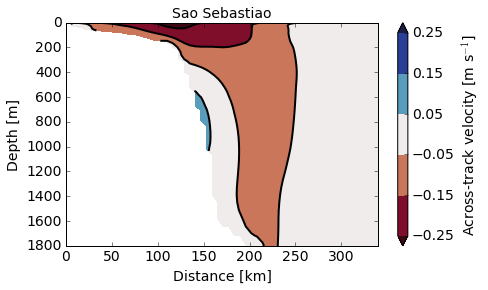

In [129]:
fig = plt.figure(figsize =(7,4))

plt.subplot(111)
plt.contourf(dists,zs,vs,cv,cmap=cmocean.cm.balance_r,vmin=cv.min(),
             vmax=cv.max(),extend='both')
plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists,zs,vs,cv,colors='k')
plt.ylim(1800,0)
plt.xlim(0,340)
plt.xlabel('Distance [km]')
plt.ylabel('Depth [m]')
plt.title('Sao Sebastiao')
plt.savefig("figures/LLC2160_VelSection_SaoSeba.pdf")

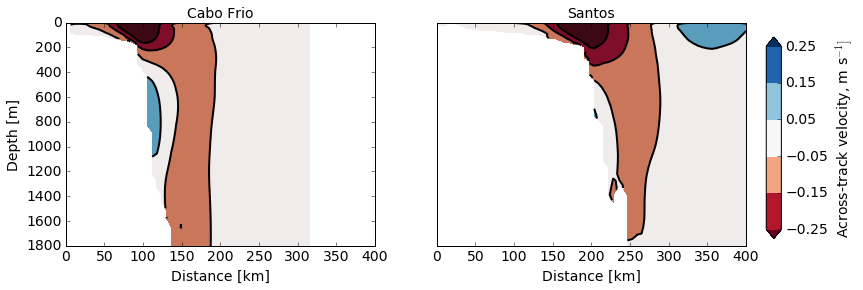

In [130]:
fig = plt.figure(figsize =(14,4))

plt.subplot(121)
cb = plt.contourf(dists_cf,zs,vs_cf,cv,cmap=cmocean.cm.balance_r,vmin=cv.min(),
             vmax=cv.max(),extend='both')

#plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists_cf,zs,vs_cf,cv,colors='k')
plt.ylim(1800,0)
plt.xlim(0,400)
plt.xlabel('Distance [km]')
plt.ylabel('Depth [m]')
plt.title('Cabo Frio')

plt.subplot(122)

cb = plt.contourf(dists_sa,zs,vs_sa,cv,cmap=cmocean.cm.balance_r,vmin=cv.min(),
             vmax=cv.max(),extend='both')

#plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists_sa,zs,vs_sa,cv,colors='k')
plt.ylim(1800,0)
plt.xlim(0,400)
plt.xlabel('Distance [km]')
#plt.ylabel('Depth [m]')
plt.yticks([])
plt.title('Santos')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, .15, 0.015, 0.7])
fig.colorbar(vf, cax=cbar_ax,label=r'Across-track velocity, m s$^{-1}]$')

__figpath__ = "figures/"
plt.savefig(__figpath__+"LLC2160_VelSections.pdf")

In [131]:
lons,lats,dists,us,vs =  extract_vel_section(pos0,pos1,snap['lon'],data['lat'],snap['u'],snap['v'],nz=68)
lons_cf,lats_cf,dists_cf,us_cf,vs_cf =  extract_vel_section(pos0_cf,pos1_cf,snap['lon'],snap['lat'],snap['u'],snap['v'],nz=68)
lons_sa,lats_sa,dists_sa,us_sa,vs_sa =  extract_vel_section(pos0_sa,pos1_sa,snap['lon'],snap['lat'],snap['u'],snap['v'],nz=68)
lons_ub,lats_ub,dists_ub,us_ub,vs_ub =  extract_vel_section(pos0_ub,pos1_ub,snap['lon'],snap['lat'],snap['u'],snap['v'],nz=68)

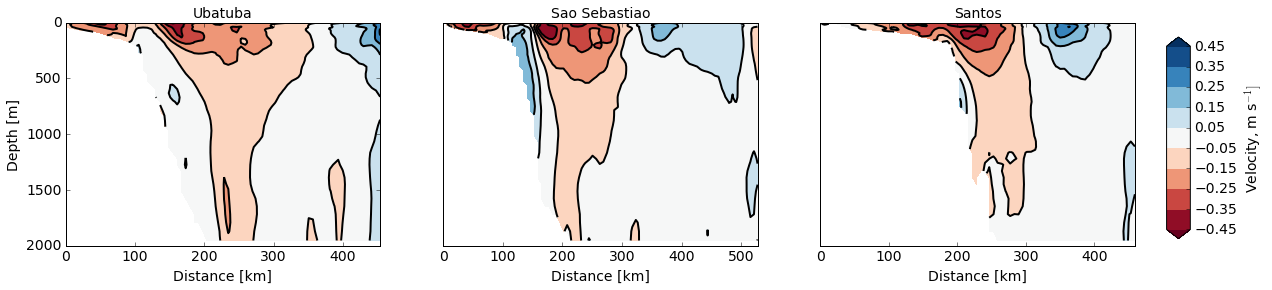

In [132]:
cv = np.linspace(-.4,.4,8)
cv = np.arange(-.45,.5,.1)

fig = plt.figure(figsize =(22,4))

plt.subplot(131)
plt.contourf(dists_ub,zs,vs_ub,cv,cmap='RdBu',vmin=cv.min(),
             vmax=cv.max(),extend='both')
#plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists_ub,zs,vs_ub,cv,colors='k')
plt.ylim(2000,0)
plt.xlabel('Distance [km]')
plt.ylabel('Depth [m]')
plt.title('Ubatuba')
plt.subplot(132)
plt.contourf(dists,zs,vs,cv,cmap='RdBu',vmin=cv.min(),
             vmax=cv.max(),extend='both')
#plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists,zs,vs,cv,colors='k')
plt.ylim(2000,0)
plt.yticks([])
plt.xlabel('Distance [km]')
plt.title('Sao Sebastiao')
#plt.ylabel('Depth [m]')

plt.subplot(133)
vf = plt.contourf(dists_sa,zs,vs_sa,cv,cmap='RdBu',vmin=cv.min(),
             vmax=cv.max(),extend='both')
#plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists_sa,zs,vs_sa,cv,colors='k')
plt.ylim(2000,0)
plt.yticks([])
plt.title('Santos')
plt.xlabel('Distance [km]')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, .15, 0.015, 0.7])
fig.colorbar(vf, cax=cbar_ax,label=r'Velocity, m s$^{-1}]$')

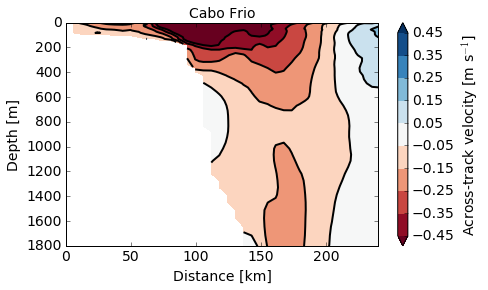

In [133]:
fig = plt.figure(figsize =(7,4))

plt.subplot(111)
plt.contourf(dists_cf,zs,vs_cf,cv,cmap='RdBu',vmin=cv.min(),
             vmax=cv.max(),extend='both')
plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists_cf,zs,vs_cf,cv,colors='k')
plt.ylim(1800,0)
plt.xlim(0,240)
plt.xlabel('Distance [km]')
plt.ylabel('Depth [m]')
plt.title('Cabo Frio')

In [134]:
ecco4 = np.load("data/eccov4.npz")

In [135]:
lons,lats,dists,us,vs =  extract_vel_section(pos0,pos1,ecco4['lon'][7],ecco4['lat'][:,4],ecco4['u'],ecco4['v'],nz=50,dd=50.)
lons_cf,lats_cf,dists_cf,us_cf,vs_cf =  extract_vel_section(pos0_cf,pos1_cf,ecco4['lon'][7],ecco4['lat'][:,4],ecco4['u'],ecco4['v'],nz=50,dd=50.)
lons_ub,lats_ub,dists_ub,us_ub,vs_ub =  extract_vel_section(pos0_ub,pos1_ub,ecco4['lon'][7],ecco4['lat'][:,4],ecco4['u'],ecco4['v'],nz=50,dd=50.)
lons_sa,lats_sa,dists_sa,us_sa,vs_sa =  extract_vel_section(pos0_sa,pos1_sa,ecco4['lon'][7],ecco4['lat'][:,4],ecco4['u'],ecco4['v'],nz=50,dd=50.)

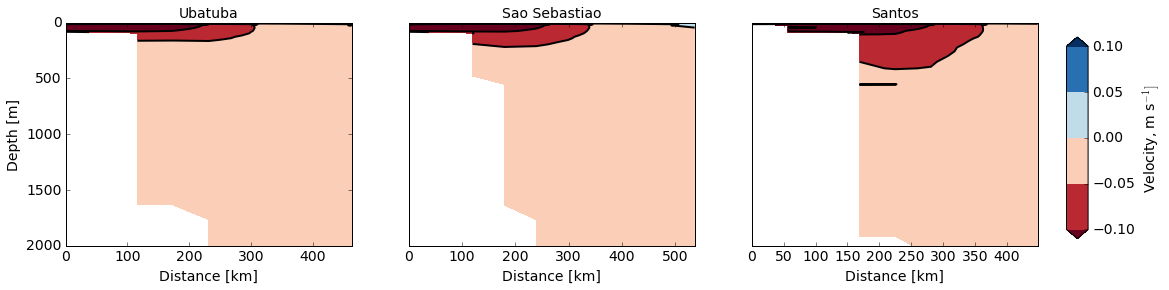

In [136]:
cv = np.arange(-.1,.1025,.05)
z = ecco4['z']
fig = plt.figure(figsize =(20,4))

plt.subplot(131)
plt.contourf(dists_ub,z,vs_ub,cv,cmap='RdBu',vmin=cv.min(),
             vmax=cv.max(),extend='both')
#plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists_ub,z,vs_ub,cv,colors='k')
plt.ylim(2000,0)
plt.xlabel('Distance [km]')
plt.ylabel('Depth [m]')
plt.title('Ubatuba')
plt.subplot(132)
plt.contourf(dists,z,vs,cv,cmap='RdBu',vmin=cv.min(),
             vmax=cv.max(),extend='both')
#plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists,z,vs,cv,colors='k')
plt.ylim(2000,0)
plt.yticks([])
plt.xlabel('Distance [km]')
plt.title('Sao Sebastiao')
#plt.ylabel('Depth [m]')

plt.subplot(133)
vf = plt.contourf(dists_sa,z,vs_sa,cv,cmap='RdBu',vmin=cv.min(),
             vmax=cv.max(),extend='both')
#plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists_sa,z,vs_sa,cv,colors='k')
plt.ylim(2000,0)
plt.yticks([])
plt.title('Santos')
plt.xlabel('Distance [km]')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, .15, 0.015, 0.7])
fig.colorbar(vf, cax=cbar_ax,label=r'Velocity, m s$^{-1}]$')

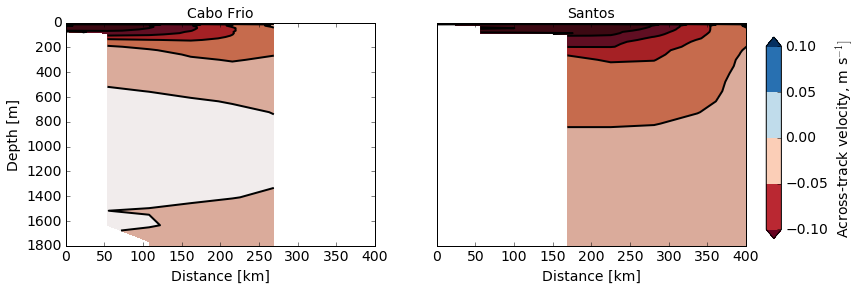

In [137]:
cv = np.linspace(-.1,.105,10)

fig = plt.figure(figsize =(14,4))

plt.subplot(121)
cb = plt.contourf(dists_cf,z,vs_cf,cv,cmap=cmocean.cm.balance_r,vmin=cv.min(),
             vmax=cv.max(),extend='both')

#plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists_cf,z,vs_cf,cv,colors='k')
plt.ylim(1800,0)
plt.xlim(0,400)
plt.xlabel('Distance [km]')
plt.ylabel('Depth [m]')
plt.title('Cabo Frio')

plt.subplot(122)

cb = plt.contourf(dists_sa,z,vs_sa,cv,cmap=cmocean.cm.balance_r,vmin=cv.min(),
             vmax=cv.max(),extend='both')

#plt.colorbar(label='Across-track velocity [m s$^{-1}$]')
plt.contour(dists_sa,z,vs_sa,cv,colors='k')
plt.ylim(1800,0)
plt.xlim(0,400)
plt.xlabel('Distance [km]')
#plt.ylabel('Depth [m]')
plt.yticks([])
plt.title('Santos')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, .15, 0.015, 0.7])
fig.colorbar(vf, cax=cbar_ax,label=r'Across-track velocity, m s$^{-1}]$')

__figpath__ = "figures/"
plt.savefig(__figpath__+"ECCOv4_VelSections.pdf")

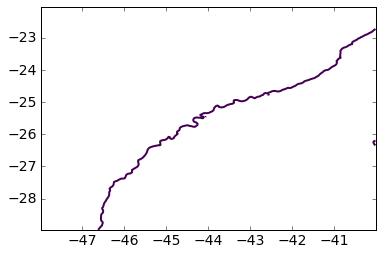

In [287]:
# get 1500m isobath coordinates
#cs = plt.contour(snap['lon'],['lat'],snap['topo'],[1500.])
#cs.collections[0].get_paths()
lont,latt = np.meshgrid(snap['lon'],snap['lat'])
cs = plt.contour(lont,latt,snap['topo'],[2000.])
p = cs.collections[0].get_paths()[1]

v = p.vertices
lon1200 = v[:,0][::10]
lat1200 = v[:,1][::10]

In [288]:
ilon = np.empty_like(lon1200)
ilat = np.empty_like(ilon) 
for i in range(ilon.size):
    ilon[i],ilat[i] = find_nearest_ind(ecco4['lon'][7],ecco4['lat'][:,8],lon1200[i],lat1200[i])


In [289]:
# rotation matrix
ang01 = -30*np.pi/180.
c,s = np.cos(ang01), np.sin(ang01)
R = np.array([[c,s],[-s,c]]).squeeze()

for iz in range(50):
    
    uaux = sp.ndimage.map_coordinates(ecco4['u'][iz], np.vstack((ilat,ilon)),order=1)
    vaux = sp.ndimage.map_coordinates(ecco4['v'][iz], np.vstack((ilat,ilon)),order=1)

    #urot = np.einsum("ij,jk->ik",R,np.vstack([uaux,vaux])) # this is pretty cool
    #uaux, vaux = urot[0],urot[1]
    
    if iz == 0:
        u = uaux[np.newaxis,...]
        v = uaux[np.newaxis,...]
    else:
        u = np.concatenate([u,uaux[np.newaxis,...]])
        v = np.concatenate([v,vaux[np.newaxis,...]])

In [290]:
dist, ang = sw.dist(lon=lon1200, lat=lat1200, units='km')
ang = np.hstack([ang[0],ang])
ang = (180+ang)*np.pi/180.
c,s = np.cos(ang), np.sin(ang)
R = np.array([[c,-s],[s,c]])
R = R[...,np.newaxis,:]
V = np.vstack([u[np.newaxis],v[np.newaxis]])
V.shape, R.shape

urot = np.einsum("ij...,j...->i...",R,V) # this is pretty cool
u, v = urot[0],urot[1]

In [291]:
dist,ang = sw.dist(lat = lat1200,lon=lon1200,units='km')
dist = np.cumsum(np.hstack([0.,dist]))

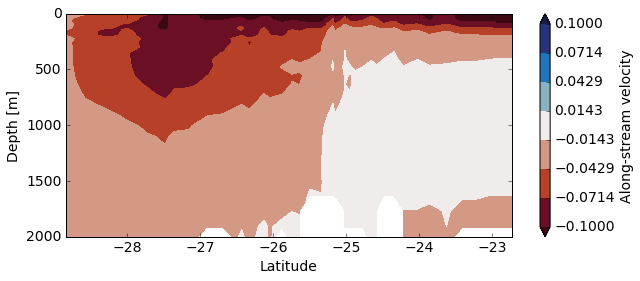

In [292]:
cv = np.linspace(-.1,.1,8)
fig = plt.figure(figsize =(10,4))

plt.subplot(111)
cb = plt.contourf(lat1200,ecco4['z'],v,cv,cmap=cmocean.cm.balance_r,extend='both')
plt.colorbar(label='Along-stream velocity')
#plt.contour(lat1200,ecco4['z'],v,cv,colors='k')
plt.ylim(2000,0)
plt.xlabel('Latitude')
plt.ylabel('Depth [m]')

__figpath__ = "figures/"
plt.savefig(__figpath__+"ECCOv4_AlonTrackVel.pdf")

In [293]:
ilon = np.empty_like(lon1200)
ilat = np.empty_like(ilon) 
for i in range(ilon.size):
    ilon[i],ilat[i] = find_nearest_ind(data['lon'],data['lat'],lon1200[i],lat1200[i])

In [294]:
# rotation matrix
ang01 = 0*np.pi/180.
c,s = np.cos(ang01), np.sin(ang01)
R = np.array([[c,s],[-s,c]]).squeeze()

for iz in range(68):
    
    uaux = sp.ndimage.map_coordinates(data['u'][iz], np.vstack((ilat,ilon)),order=1)
    vaux = sp.ndimage.map_coordinates(data['v'][iz], np.vstack((ilat,ilon)),order=1)

    #urot = np.einsum("ij,jk->ik",R,np.vstack([uaux,vaux])) # this is pretty cool
    #uaux, vaux = urot[0],urot[1]
    
    if iz == 0:
        u = uaux[np.newaxis,...]
        v = uaux[np.newaxis,...]
    else:
        u = np.concatenate([u,uaux[np.newaxis,...]])
        v = np.concatenate([v,vaux[np.newaxis,...]])

In [295]:
dist, ang = sw.dist(lon=lon1200, lat=lat1200, units='km')
ang = np.hstack([ang[0],ang])
ang = (180+ang)*np.pi/180.
c,s = np.cos(ang), np.sin(ang)
R = np.array([[c,-s],[s,c]])
R = R[...,np.newaxis,:]
V = np.vstack([u[np.newaxis],v[np.newaxis]])
V.shape, R.shape

urot = np.einsum("ij...,j...->i...",R,V) # this is pretty cool
u, v = urot[0],urot[1]

In [296]:
dist,ang = sw.dist(lat = lat1200,lon=lon1200,units='km')
dist = np.cumsum(np.hstack([0.,dist]))

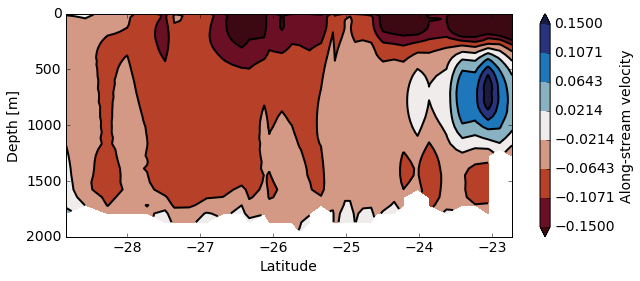

In [297]:
cv = np.linspace(-.15,.15,8)
fig = plt.figure(figsize =(10,4))

plt.subplot(111)
cb = plt.contourf(lat1200,zs,v,cv,cmap=cmocean.cm.balance_r,extend='both')
plt.colorbar(label='Along-stream velocity')
plt.contour(lat1200,zs,v,cv,colors='k')
plt.ylim(2000,0)
plt.xlabel('Latitude')
plt.ylabel('Depth [m]')

__figpath__ = "figures/"
plt.savefig(__figpath__+"LLC2160_AlonTrackVel.pdf")